# Homework #6

Carina Cheng

# 1) Load Data

In [1]:
import glob
from skimage import io
import numpy as np

names = [] # will hold all the class names
images = [] # will hold images
name0 = 'airplanes' # initial name
print("Loading images...")
for file in glob.glob("50_categories/*/*"):
    name = file.split('/')[1]
    names.append(name)
    image = io.imread(file)
    images.append(image)
    if name != name0:
        print(' ',name0,':',str(len(glob.glob("50_categories/"+name0+'/*')))+" images")
        name0 = name
    
images = np.array(images)
names = np.array(names)
print("Loaded",len(names),"total images")

Loading images...
  airplanes : 533 images
  bat : 71 images
  bear : 68 images
  blimp : 57 images
  camel : 73 images
  comet : 81 images
  conch : 69 images
  cormorant : 71 images
  crab : 57 images
  dog : 68 images
  dolphin : 71 images
  duck : 58 images
  elephant : 87 images
  elk : 67 images
  frog : 77 images
  galaxy : 54 images
  giraffe : 56 images
  goat : 75 images
  goldfish : 62 images
  goose : 73 images
  gorilla : 141 images
  helicopter : 59 images
  horse : 180 images
  hot-air-balloon : 59 images
  hummingbird : 77 images
  iguana : 71 images
  kangaroo : 55 images
  killer-whale : 61 images
  leopards : 127 images
  llama : 79 images
  mars : 104 images
  mussels : 116 images
  octopus : 74 images
  ostrich : 73 images
  owl : 80 images
  penguin : 99 images
  porcupine : 67 images
  raccoon : 93 images
  saturn : 64 images
  skunk : 54 images
  snail : 79 images
  snake : 75 images
  speed-boat : 67 images
  starfish : 54 images
  swan : 77 images
  teddy-bear

# 2) Extract Features

In [2]:
from sklearn.preprocessing import Imputer
from scipy import signal

def get_features(image):
    """
    Obtains features for an image.
        Input: image data (typically 3-dimensions, where the 3rd dimension is color)
        Outputs: array of features
            1) Array size in x-dimension
            2) Array size in y-dimension
            3) Average of red channel colors
            4) Cross-correlation between red and green
            5) Cross-correlation between red and blue
            6) Cross-correlation between green and blue
            7)
            8)
            9)
            10)
            11)
            12)
            13)
            14)
            15)
    """
    f1 = image.shape[:2][0]
    f2 = image.shape[:2][1]
    try: f3 = np.mean(image[:,:,0]) # if red channel exists
    except: f3 = np.nan
    try: 
        f4 = np.mean(np.corrcoef(image[:,:,0],image[:,:,1]))
        f5 = np.mean(np.corrcoef(image[:,:,0],image[:,:,2]))
        f6 = np.mean(np.corrcoef(image[:,:,1],image[:,:,2]))
    except:
        f4, f5, f6 = np.nan, np.nan, np.nan
    features = [f1,f2,f3,f4,f5,f6]
    feature_names = ['array size in x-dimension', 'array size in y-dimension', 'average of red channel colors',
                    'cross-correlation between red and green', 'cross-correlation between red and blue',
                    'cross-correlation between green and blue']
    return np.array(features), feature_names

# Loop over all images and extract features
order = np.arange(len(names)) 
np.random.shuffle(order) # randomly shuffle the order
names = names[order]
images = images[order]
data = [] # will hold features of each image
for ii,image in enumerate(images): 
    row, feature_names = get_features(image)
    data.append(row) 
data = np.array(data)

# Fill in missing values
imp = Imputer(missing_values=np.nan, strategy='mean', axis=0) # mean over images
data = imp.fit_transform(data)

print("Data has shape",data.shape,"= (number of images, number of features)")

/anaconda2/envs/conda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda2/envs/conda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Data has shape (4244, 6) = (number of images, number of features)


# 3) Model and Metrics

In [3]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import math
import logging
from sklearn.externals import joblib

X = data
Y = names

# Divide test and training sets
half = math.floor(len(Y)/2) # cut data in half 
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]

# Build basic random forest classifier
clf_basic = RandomForestClassifier(n_estimators=10) 
clf_basic.fit(train_X, train_Y)
joblib.dump(clf_basic, 'clf_basic.pkl') # save classifier
print("Saving clf_basic.pkl")

# Find optimal classifier
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
parameters = {'n_estimators':[20,50,100],  'max_features':['auto'], 
             'criterion': ['gini','entropy']}
rf_tune = model_selection.GridSearchCV(RandomForestClassifier(), parameters, 
                                   n_jobs = -1, cv = 5, verbose = 0) # loops over all possibilities
rf_opt = rf_tune.fit(train_X, train_Y)

print("Optimal Model:\n" + str(rf_opt.best_estimator_))
clf_opt = rf_opt.best_estimator_
joblib.dump(clf_opt, 'clf_opt.pkl') # save classifier
print("Saving clf_opt.pkl")

Saving clf_basic.pkl
Optimal Model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Saving clf_opt.pkl


Percentage of correct identifications: 0.210179076343
Percentage using pure guessing: 0.02

Confusion Matrix for Basic CLF:


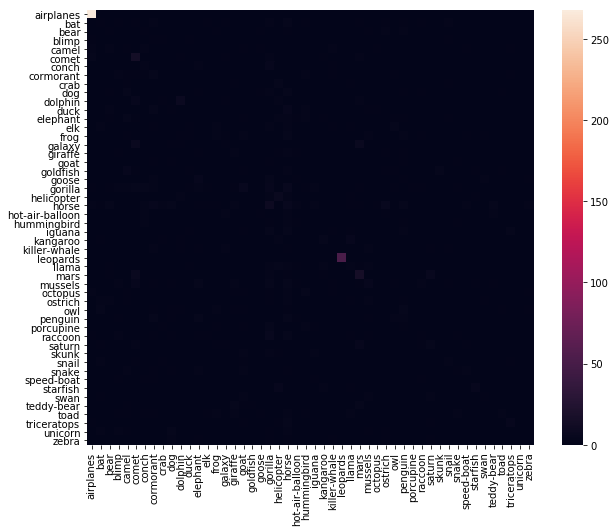

Percentage of correct identifications: 0.221960414703
Percentage using pure guessing: 0.02

Confusion Matrix for Optimal CLF:


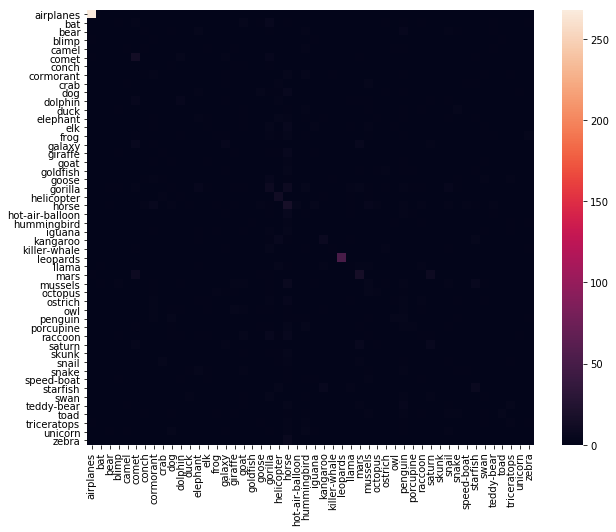

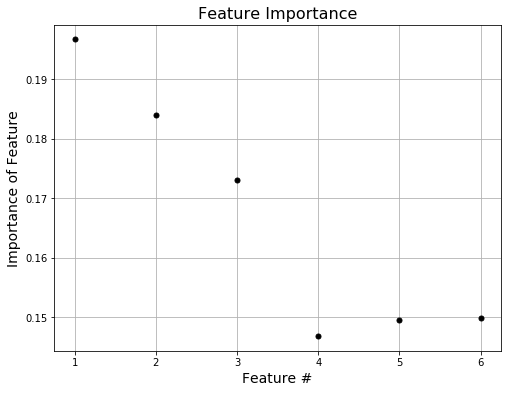

The three most important features are:

1. array size in x-dimension 

2. array size in y-dimension 

3. average of red channel colors 



In [4]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Re-load models
clf_basic = joblib.load('clf_basic.pkl')  
clf_opt = joblib.load('clf_opt.pkl')

# Look at results from basic clf
Y_pred = clf_basic.predict(test_X) 
loss_basic = metrics.zero_one_loss(test_Y, Y_pred) # zero-one loss
print("Percentage of correct identifications:", 1-loss_basic)
print("Percentage using pure guessing:", 1/50.)

# Show confusion matrix
rf_confmat = metrics.confusion_matrix(test_Y, Y_pred) 
print("\nConfusion Matrix for Basic CLF:")
plt.figure(figsize=(10,8))
sns.heatmap(rf_confmat, annot=False,  fmt='', 
            xticklabels=[str(x) for x in np.unique(names)], yticklabels=[str(x) for x in np.unique(names)])
plt.show()

# Look at results from optimal clf
Y_pred = clf_opt.predict(test_X)
loss_opt = metrics.zero_one_loss(test_Y, Y_pred) # zero-one loss
print("Percentage of correct identifications:", 1-loss_opt)
print("Percentage using pure guessing:", 1/50.)

# Show confusion matrix
rf_confmat = metrics.confusion_matrix(test_Y, Y_pred) 
print("\nConfusion Matrix for Optimal CLF:")
plt.figure(figsize=(10,8))
sns.heatmap(rf_confmat, annot=False,  fmt='', 
            xticklabels=[str(x) for x in np.unique(names)], yticklabels=[str(x) for x in np.unique(names)])
plt.show()

# Find 3 most important features
feature_importances = rf_opt.best_estimator_.feature_importances_
plt.figure(figsize=(8,6))
plt.plot(np.arange(len(feature_importances))+1,feature_importances,'k.',markersize=10)
plt.xlabel('Feature #', fontsize=14)
plt.ylabel('Importance of Feature', fontsize=14)
plt.title('Feature Importance', fontsize=16)
plt.grid()
plt.show()
feature_order = np.argsort(np.array(feature_importances))[::-1]
print("The three most important features are:\n")
print("1.",feature_names[feature_order[0]],"\n")
print("2.",feature_names[feature_order[1]],"\n")
print("3.",feature_names[feature_order[2]],"\n")

# 4) Final Classifier